In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import yfinance as yf
import pickle
import mplfinance as mpl

sns.set()

ta_patterns = ta.get_function_groups()['Pattern Recognition']

In [2]:
with open('/Users/orentapiero/Data/Mid5T.pickle', 'rb') as handle:
    Mid = pickle.load(handle)
    
with open('/Users/orentapiero/Data/Bid5T.pickle', 'rb') as handle:
    Bid = pickle.load(handle)

with open('/Users/orentapiero/Data/Ask5T.pickle', 'rb') as handle:
    Ask = pickle.load(handle)

In [3]:
def _init_data(data):
    return data.groupby(data.index).first()
    

def fwd_pnl(ask,bid,L,pos = 1):
    
    if pos == 1:
        pnl = pd.concat([10000*np.log(bid.shift(-i)/ask) for i in range(1,L+1)],axis = 1)
    else:
        pnl = pd.concat([-10000*np.log(ask.shift(-i)/bid) for i in range(1,L+1)],axis = 1)
    
    pnl.columns = np.arange(1,L+1)
    
    return pnl
    
    
class Patterns(object):
    
    def __init__(self,Open,High,Low,Close,Bid,Ask,L,pos):
        self.Open = Open
        self.High = High
        self.Low = Low
        self.Close = Open
        self.Bid = Bid
        self.Ask = Ask
        self.L = L
        self.pos = pos
    
    def ta_pattern_fit(self,pattern_name,smth = True,ma = 3):
        
        if smth is True:
            sOpen = self.Open.rolling(ma).mean().dropna()
            sHigh = self.High.rolling(ma).mean().dropna()
            sLow = self.Low.rolling(ma).mean().dropna()
            sClose = self.Close.rolling(ma).mean().dropna()
            patt = getattr(ta,pattern_name)(sOpen,sHigh,sLow,sClose)
        else:
            Open = self.Open.copy()
            High = self.High.copy()
            Low = self.Low.copy()
            Close = self.Close.copy()
            patt = getattr(ta,pattern_name)(Open,High,Low,Close)

        patt.name = pattern_name
        pnls = fwd_pnl(self.Ask,self.Bid,self.L,self.pos)
        
        Pnls = pd.concat([patt,pnls],axis = 1)
        
        return Pnls

In [4]:
pair = 'usdjpy'

ask = _init_data(Ask[pair]['close'].fillna(method = 'ffill'))
bid = _init_data(Bid[pair]['close'].fillna(method = 'ffill'))

Open = _init_data(Mid[pair]['open'].fillna(method = 'ffill'))
High = _init_data(Mid[pair]['high'].fillna(method = 'ffill'))
Low = _init_data(Mid[pair]['low'].fillna(method = 'ffill'))
Close = _init_data(Mid[pair]['close'].fillna(method = 'ffill'))

L = 12*4
pos = 1

self = Patterns(Open,High,Low,Close,bid,ask,L,pos)

In [5]:
for pattern_name in ta_patterns:
    pnls = self.ta_pattern_fit(pattern_name,smth=True,ma=7).dropna()
    display(pnls.between_time('07:00','19:00').groupby(pattern_name).mean())

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDL2CROWS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDL3BLACKCROWS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDL3INSIDE,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDL3LINESTRIKE,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDL3OUTSIDE,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDL3STARSINSOUTH,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDL3WHITESOLDIERS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLABANDONEDBABY,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLADVANCEBLOCK,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLBELTHOLD,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLBREAKAWAY,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLCLOSINGMARUBOZU,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLCONCEALBABYSWALL,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLCOUNTERATTACK,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLDARKCLOUDCOVER,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLDOJI,,,,,,,,,,,,,,,,,,,,,
100.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLDOJISTAR,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLDRAGONFLYDOJI,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334131,-0.326982,-0.319390,-0.312529,-0.305418,-0.298637,-0.292255,-0.286276,-0.280414,-0.274242,...,-0.102891,-0.09737,-0.091950,-0.085944,-0.080204,-0.074914,-0.070418,-0.065835,-0.060951,-0.055805
100.0,-0.465166,-0.136552,-0.682857,-0.692362,-1.080839,-1.274499,-1.710208,-1.098818,-1.231839,-0.898704,...,-1.853482,-1.70270,-1.461068,-1.750191,-2.436260,-2.362464,-2.143165,-2.278077,-2.888501,-3.275629


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLENGULFING,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLEVENINGDOJISTAR,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLEVENINGSTAR,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLGAPSIDESIDEWHITE,,,,,,,,,,,,,,,,,,,,,
-100.0,-0.356784,-0.340608,-0.332238,-0.336748,-0.338328,-0.301133,-0.289463,-0.263800,-0.233541,-0.243319,...,0.051845,0.055567,0.068253,0.038936,0.040236,0.082864,0.088980,0.087910,0.063502,0.099167
0.0,-0.331706,-0.324367,-0.316545,-0.310295,-0.299869,-0.297179,-0.294778,-0.289623,-0.283925,-0.273362,...,-0.114002,-0.112125,-0.109723,-0.102694,-0.096222,-0.091077,-0.086685,-0.078043,-0.070059,-0.067105
100.0,-0.337909,-0.340537,-0.338120,-0.313618,-0.334453,-0.315093,-0.273366,-0.275932,-0.292926,-0.316324,...,-0.144273,-0.097872,-0.066835,-0.037836,-0.037945,-0.067730,-0.062970,-0.096272,-0.097500,-0.100685


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLGRAVESTONEDOJI,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334028,-0.326707,-0.319344,-0.312483,-0.305487,-0.298755,-0.292346,-0.286116,-0.280153,-0.273921,...,-0.102921,-0.097324,-0.091628,-0.085707,-0.080053,-0.074626,-0.070105,-0.065677,-0.060945,-0.055852
100.0,-0.595277,-0.738384,-0.597671,-0.598697,-0.588486,-0.595532,-0.874425,-1.014999,-1.271650,-1.204094,...,-0.974119,-1.033345,-1.418289,-1.410082,-1.610831,-1.824482,-1.753908,-1.532971,-1.571688,-1.675767


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHAMMER,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHANGINGMAN,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHARAMI,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHARAMICROSS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHIGHWAVE,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHIKKAKE,,,,,,,,,,,,,,,,,,,,,
-200.0,-0.328409,-0.138001,-0.280770,0.023740,0.558261,0.559095,-0.358785,-0.457648,-0.551182,-0.253351,...,2.567942,2.924686,2.133080,1.402017,2.747152,2.555633,2.462494,2.443222,2.972291,2.817533
-100.0,-0.346742,-0.338813,-0.358271,-0.356705,-0.295190,-0.306701,-0.256279,-0.248881,-0.276973,-0.347251,...,-0.133078,-0.100815,-0.112334,-0.124016,-0.085191,-0.091773,-0.150596,-0.089858,-0.111295,-0.086109
0.0,-0.334863,-0.325807,-0.318329,-0.311193,-0.306947,-0.299324,-0.292495,-0.286884,-0.279700,-0.272158,...,-0.114690,-0.109854,-0.103895,-0.099988,-0.097438,-0.091013,-0.083722,-0.081612,-0.075564,-0.069965
100.0,-0.294746,-0.365204,-0.337556,-0.336592,-0.285219,-0.290120,-0.342848,-0.312320,-0.320238,-0.290435,...,0.323149,0.319595,0.332145,0.443773,0.509036,0.483542,0.454393,0.490001,0.467846,0.434715
200.0,-0.372559,0.072690,0.615515,0.382229,0.253872,-0.038491,0.326871,0.045555,-0.130684,-0.022830,...,-0.325692,0.069820,0.260266,0.106639,0.326459,0.563837,0.204606,0.578294,0.256297,0.152020


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHIKKAKEMOD,,,,,,,,,,,,,,,,,,,,,
-100.0,-3.777659,-2.978151,-4.027542,-5.411200,-5.317746,-5.507018,-5.576977,-7.504448,-7.737532,-6.181461,...,-15.521466,-15.943114,-14.281725,-14.503202,-15.976047,-17.015742,-18.726652,-13.458795,-10.330515,-14.120953
0.0,-0.334121,-0.326890,-0.319497,-0.312692,-0.305790,-0.299014,-0.292739,-0.286566,-0.280716,-0.274464,...,-0.103346,-0.097791,-0.092274,-0.086354,-0.080766,-0.075446,-0.070811,-0.066271,-0.061603,-0.056539
100.0,-3.466436,-2.834059,3.927673,12.475974,25.734813,18.786005,16.235691,15.098907,11.547602,11.740365,...,9.422432,10.877740,5.119730,5.490743,0.823908,0.471091,-8.734174,-13.360965,-10.865849,-11.201119


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLHOMINGPIGEON,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLIDENTICAL3CROWS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLINNECK,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLINVERTEDHAMMER,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLKICKING,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLKICKINGBYLENGTH,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLLADDERBOTTOM,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLLONGLEGGEDDOJI,,,,,,,,,,,,,,,,,,,,,
100.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLLONGLINE,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLMARUBOZU,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLMATCHINGLOW,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLMATHOLD,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLMORNINGDOJISTAR,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLMORNINGSTAR,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLONNECK,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLPIERCING,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLRICKSHAWMAN,,,,,,,,,,,,,,,,,,,,,
0.0,-0.338997,-0.323281,-0.310469,-0.286187,-0.286001,-0.275157,-0.304831,-0.297398,-0.267682,-0.235311,...,-0.120185,-0.108573,-0.105116,-0.097176,-0.092642,-0.087107,-0.067734,-0.060963,-0.058379,-0.044114
100.0,-0.333127,-0.327713,-0.321438,-0.318337,-0.309871,-0.304034,-0.290034,-0.284160,-0.283487,-0.282848,...,-0.099768,-0.095510,-0.089585,-0.084098,-0.078338,-0.073076,-0.071713,-0.067649,-0.062482,-0.059437


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLRISEFALL3METHODS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLSEPARATINGLINES,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLSHOOTINGSTAR,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLSHORTLINE,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLSPINNINGTOP,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLSTALLEDPATTERN,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLSTICKSANDWICH,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLTAKURI,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334131,-0.326982,-0.319390,-0.312529,-0.305418,-0.298637,-0.292255,-0.286276,-0.280414,-0.274242,...,-0.102891,-0.09737,-0.091950,-0.085944,-0.080204,-0.074914,-0.070418,-0.065835,-0.060951,-0.055805
100.0,-0.465166,-0.136552,-0.682857,-0.692362,-1.080839,-1.274499,-1.710208,-1.098818,-1.231839,-0.898704,...,-1.853482,-1.70270,-1.461068,-1.750191,-2.436260,-2.362464,-2.143165,-2.278077,-2.888501,-3.275629


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLTASUKIGAP,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLTHRUSTING,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLTRISTAR,,,,,,,,,,,,,,,,,,,,,
-100.0,-0.339208,-0.361215,-0.323841,-0.342174,-0.339278,-0.310016,-0.295680,-0.305714,-0.298794,-0.277630,...,-0.066758,-0.030846,-0.030020,-0.019434,-0.037426,-0.040667,-0.012734,-0.006960,-0.001687,-0.011732
0.0,-0.330928,-0.321938,-0.318902,-0.307947,-0.302741,-0.297393,-0.290042,-0.286312,-0.279696,-0.270760,...,-0.107358,-0.103383,-0.100212,-0.092552,-0.083130,-0.076790,-0.076224,-0.072367,-0.068529,-0.065614
100.0,-0.359153,-0.338814,-0.320617,-0.326507,-0.298790,-0.301888,-0.313875,-0.269066,-0.271698,-0.305125,...,-0.103295,-0.113433,-0.081816,-0.096672,-0.103495,-0.099171,-0.081043,-0.071365,-0.059153,-0.019364


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLUNIQUE3RIVER,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLUPSIDEGAP2CROWS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CDLXSIDEGAP3METHODS,,,,,,,,,,,,,,,,,,,,,
0.0,-0.334168,-0.326928,-0.319493,-0.312636,-0.305639,-0.298914,-0.292658,-0.286507,-0.280685,-0.27442,...,-0.103388,-0.097826,-0.092339,-0.086417,-0.080874,-0.075564,-0.071007,-0.066463,-0.061755,-0.05672


In [57]:
pattern_name = 'CDLHIKKAKE'

pnls = self.ta_pattern_fit(pattern_name,smth=True,ma=7).dropna()
table = pnls.between_time('07:00','19:00').groupby(pattern_name).mean()

<AxesSubplot:xlabel='TIMESTAMP'>

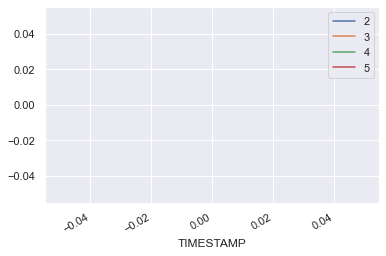

In [7]:
pnls.loc[pnls[pattern_name]==200,(2,3,4,5)].between_time('07:00','19:00').cumsum().plot()

In [10]:
pnls[pattern_name].sum()

0.0

In [8]:
pnls[pattern_name]==200

TIMESTAMP
2014-01-01 22:40:00    False
2014-01-01 22:45:00    False
2014-01-01 22:50:00    False
2014-01-01 22:55:00    False
2014-01-01 23:00:00    False
                       ...  
2021-05-31 03:25:00    False
2021-05-31 03:30:00    False
2021-05-31 03:35:00    False
2021-05-31 03:40:00    False
2021-05-31 03:45:00    False
Name: CDLXSIDEGAP3METHODS, Length: 551875, dtype: bool